In [1]:
import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import norm
import pymc as pm
print(f"PyMC version - v{pm.__version__}")

PyMC version - v5.22.0


In [219]:
data = pd.read_csv('./data/housing_price.csv')
data.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'RoofStyle', 'RoofMatl', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleConditi

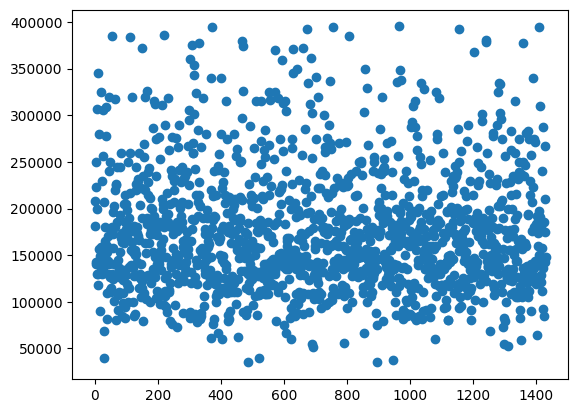

In [3]:
plt.figure()
plt.scatter(range(len(data)),data['SalePrice']);

In [4]:
# to_drop = ['Fence', 'PoolQC','GarageYrBlt', '2ndFlrSF', 'Exterior1st', 'BedroomAbvGr', 'BldgType', 'YearRemodAdd', 'GarageType', 'BsmtFinSF1', 'Neighborhood', 'Fireplaces', 'MasVnrType', 'TotalBsmtSF']
# refer house price data preprocessing notebook for details

df_house = data.copy()
x= df_house.applymap(type).eq(str).any().any()
# nan_cols = x[x>0].index
print(x)

False


/var/folders/5z/y5jrt5n57_q_qvg8yndn3tj00000gn/T/ipykernel_38514/1657672195.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x= df_house.applymap(type).eq(str).any().any()


In [5]:
(df_house['Utilities'])[468]

2

In [6]:
az.style.use('arviz-darkgrid')
RANDOM_SEED = 58
rng = np.random.default_rng(RANDOM_SEED)

def standardize(series,mean,std):
    return (series - mean)/std

0


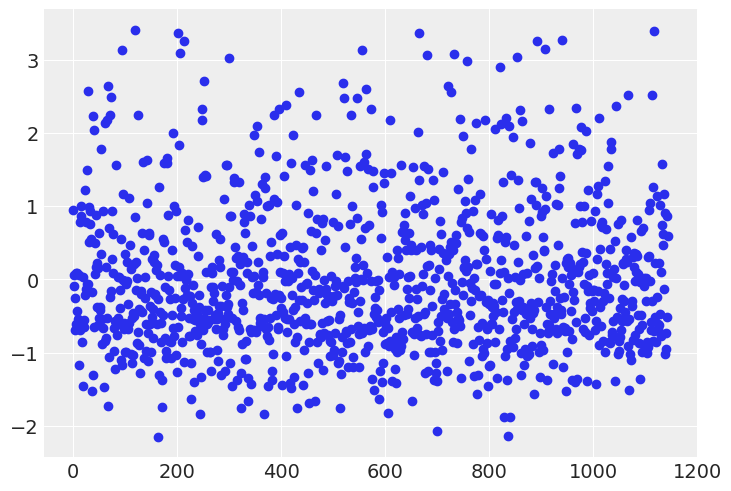

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df_house.drop(columns=['Id','Unnamed: 0','SalePrice']),
    df_house['SalePrice'],
    test_size=0.2
    )
mean_train = (X_train.mean(axis=0))
std_train = X_train.std(axis=0)
print(np.sum(std_train==0))

mean_ytrain = y_train.mean(axis=0)
std_ytrain = y_train.std(axis=0)

X_train = (X_train - mean_train)/std_train
X_test = (X_test - mean_train)/std_train
y_train = (y_train - mean_ytrain)/std_ytrain
y_test = (y_test - mean_ytrain)/std_ytrain

plt.figure()
plt.scatter(range(len(X_train)),y_train)

In [222]:
X_train['MSZoning']

729     0.365584
521     0.365584
1165    0.365584
1417    0.365584
1169    0.365584
1123    0.365584
26      0.365584
900     0.365584
531     0.365584
19      0.365584
862     0.365584
447    -2.163684
1274    0.365584
387     0.365584
1150    0.365584
1218    0.365584
936     0.365584
101     0.365584
1018   -2.163684
1303    0.365584
1305    0.365584
1198    0.365584
40      0.365584
916     0.365584
1344    0.365584
775     0.365584
548     0.365584
1398    0.365584
1054    0.365584
701     0.365584
897     0.365584
327    -2.163684
152     0.365584
787     0.365584
444     1.630218
600    -2.163684
1147    0.365584
1040   -2.163684
581     0.365584
514     0.365584
27      0.365584
412    -2.163684
456    -2.163684
253     0.365584
275     1.630218
309     0.365584
128     0.365584
1196    0.365584
486     0.365584
943     0.365584
537     0.365584
31      0.365584
599     0.365584
267     0.365584
1010    0.365584
965    -2.163684
561     0.365584
193     0.365584
830    -2.1636

## Bayesian model

In [9]:
cols = (df_house.columns).drop(['Id','Unnamed: 0','SalePrice'])

In [10]:
import numpy.ma as ma

print(X_train[X_train.isna().any(axis=1)])
print(ma.isMaskedArray(X_train))

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Condition1, Condition2, HouseStyle, OverallQual, OverallCond, YearBuilt, RoofStyle, RoofMatl, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, FireplaceQu, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows x 65 columns]
False


In [257]:
coords = {"feature":cols}

with pm.Model(coords=coords) as lr_model:
    X = pm.Data("X",X_train,dims=["obs","feature"])
    y = pm.Data("y",y_train,dims=["obs"])
    
    intercept = pm.Normal("intercept",mu=0,sigma=10)
    betas = pm.Normal("betas",mu=0,sigma=2,dims="feature")
    sigma = pm.HalfNormal("sigma",sigma=1)

    mu = pm.Deterministic("mu",intercept + pm.math.dot(X,betas))

    y_obs = pm.Normal("SalePrice",mu=mu,sigma=sigma,observed=y)
    idata = pm.sample();
    idata.extend(pm.sample_posterior_predictive(idata, return_inferencedata=True))
    pm.compute_log_likelihood(idata)
    

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 53 seconds.
Sampling: [SalePrice]


Output()

Output()

In [71]:
az.summary(idata);

In [12]:
loo = az.loo(idata,pointwise=True)

/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


5


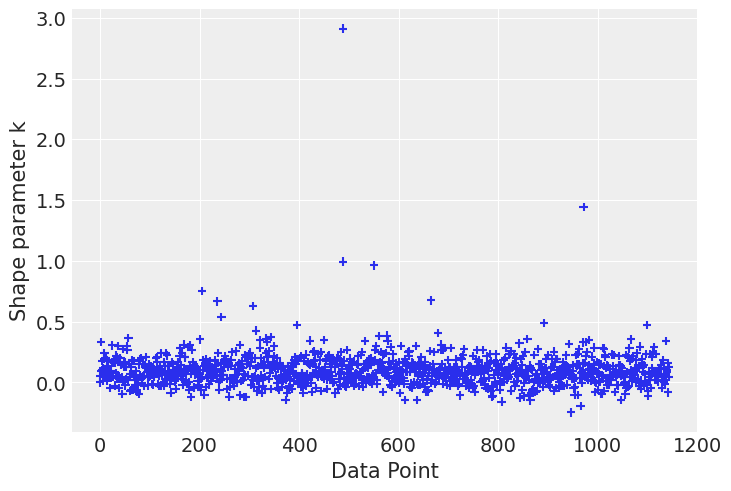

In [13]:
az.plot_khat(loo)
k_values = loo.pareto_k.values
high_kval = k_values[k_values>0.7]
print(len(high_kval))

<AxesSubplot: xlabel='SalePrice'>

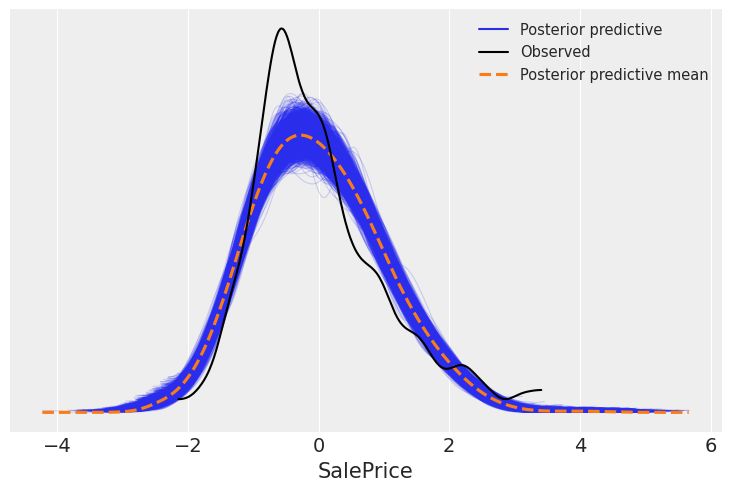

In [69]:
az.plot_ppc(idata, group="posterior", data_pairs={"SalePrice": "SalePrice"})

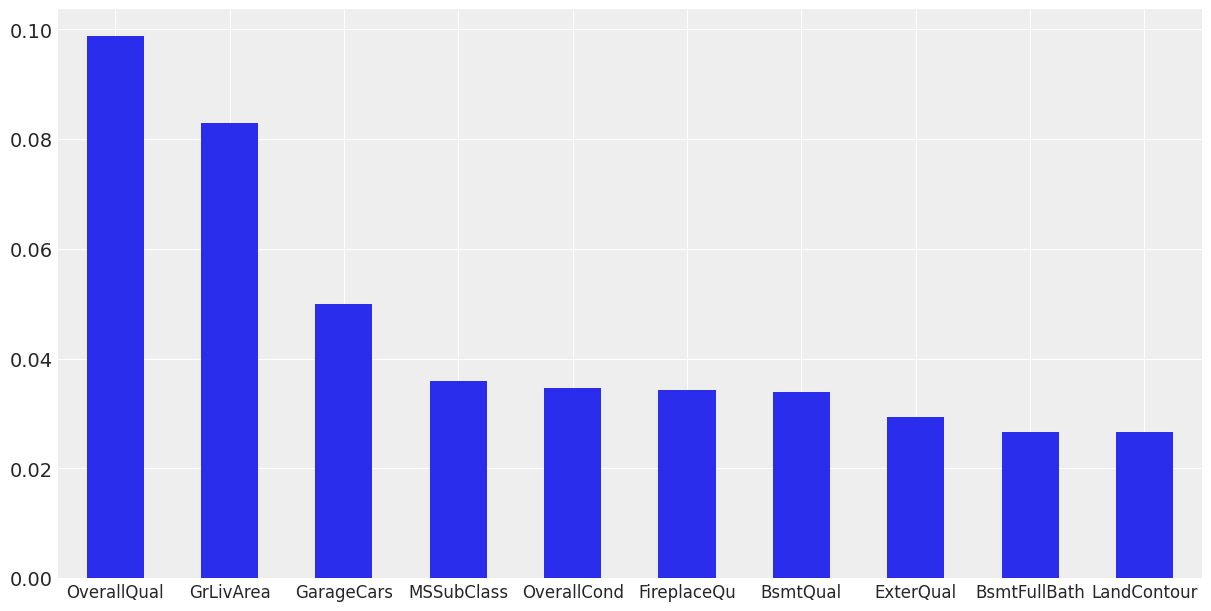

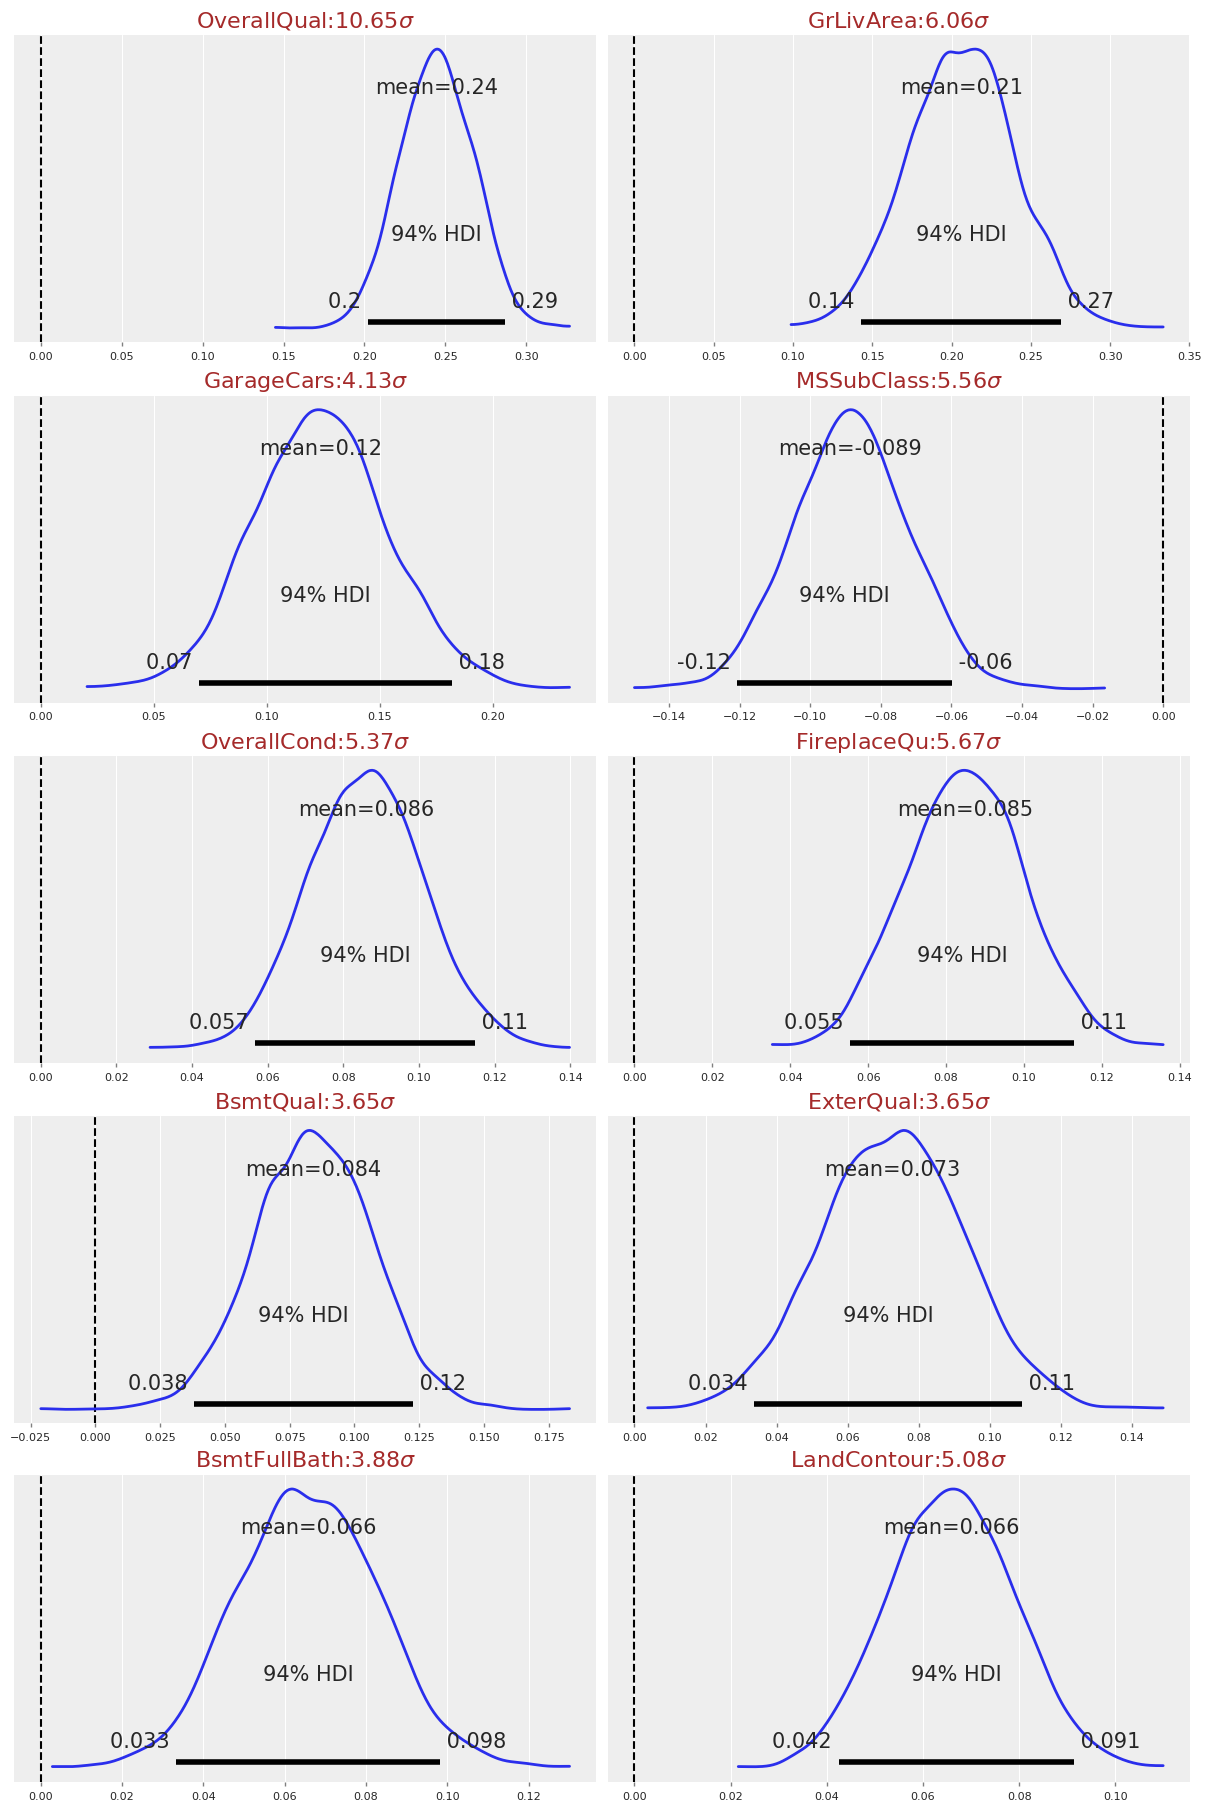

In [204]:
df_bayes_model = az.summary(idata,var_names="betas",kind='all')[["mean","sd","hdi_3%","hdi_97%"]]
df_bayes_model.index = cols
df_bayes_model["mean_abs"] = abs(df_bayes_model["mean"])
df_bayes_model["confidence"] = df_bayes_model["mean_abs"]/df_bayes_model["sd"]
df_bayes_model.sort_values(by='mean_abs',ascending=False,inplace=True)
main_features = df_bayes_model.index[:10]
(df_bayes_model[:10]["mean_abs"]/df_bayes_model['mean_abs'].sum()).plot(kind='bar',figsize=(12,6),legend=False)
plt.xticks(rotation=0,fontsize=12)
# plt.xlabel(fontsize=12)
plt.tight_layout()
plt.savefig('./bm_feat.pdf')
plt.show()
fig,ax = plt.subplots(5,2,figsize=(12,18))

for i in range(len(main_features)):
    row, col = divmod(i,2)
    ax[row,col].axvline(0,ls='--',c='k')
    az.plot_posterior(idata,var_names=['betas'],coords={"feature":main_features[i]},lw=2,ax=ax[row,col])
    ax[row,col].set_title(
        f"{main_features[i]}:{round(df_bayes_model.loc[main_features[i],'confidence'],2)}$\sigma$",
        c='brown'
        )
    ax[row,col].tick_params(axis='x',labelsize=8)
# plt.axvline(0,ls='--',c='k')
plt.savefig('./param_post_bm.pdf')
plt.show()



In [15]:

# Compute HDI

hdi_betas = az.hdi(idata,hdi_prob=0.01)["betas"]
# print(hdi_betas)
zero_consistent = (hdi_betas.sel(hdi='lower')<0 & (hdi_betas.sel(hdi='higher')>0))
predictor_zero_consistent = hdi_betas["feature"].values[zero_consistent]
print(predictor_zero_consistent,len(predictor_zero_consistent))
pd.set_option('display.max_rows', None)  
# display(az.summary(idata,var_names=['betas']))

['MSSubClass' 'LotFrontage' 'Alley' 'LotShape' 'Condition2' 'BsmtCond'
 'BsmtFinSF2' 'BsmtUnfSF' 'Heating' 'CentralAir' 'Electrical'
 'BsmtHalfBath' 'KitchenAbvGr' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolArea' 'MiscFeature' 'YrSold'] 19


In [16]:
# az.plot_pair(idata,var_names = ["betas"],coords={"feature":predictor_zero_consistent},kind='kde',marginals=True);

In [17]:
# posterior = idata.posterior.reset_coords(["obs"], drop=True)
with lr_model:
    pm.set_data({"X":X_test})
    idata_test = pm.sample_posterior_predictive(
        idata,
        var_names = ['mu'],
        return_inferencedata=True,
    )

Sampling: []


Output()

In [258]:
mu_test = idata_test.posterior_predictive["mu"].mean(dim=("chain","draw"))

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,mu_test)
r2 = r2_score(y_test,mu_test)

print("MSE: ",mse)
print("R2 score: ",r2)

MSE:  0.18766761449819994
R2 score:  0.8405238502832107


0.016828751659534777 0.43363532818740735


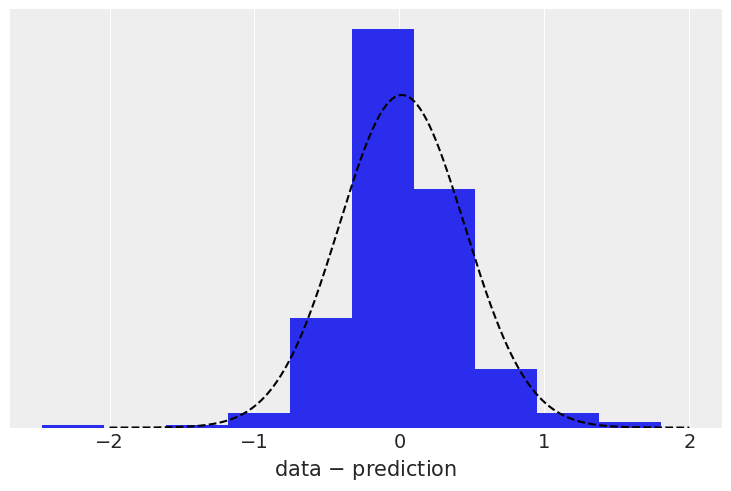

In [203]:
residuals = y_test - mu_test
mean_res = residuals.mean()
std_res = residuals.std()
print(mean_res,std_res)
x= np.linspace(-2,2,1000)
plt.plot(x,norm.pdf(x,mean_res,std_res),ls='--',c='k')
plt.yticks([])
plt.xlabel(r"data $\minus$ prediction")
plt.hist(residuals,density=True)
plt.tight_layout()
plt.savefig('./res_bm.pdf')

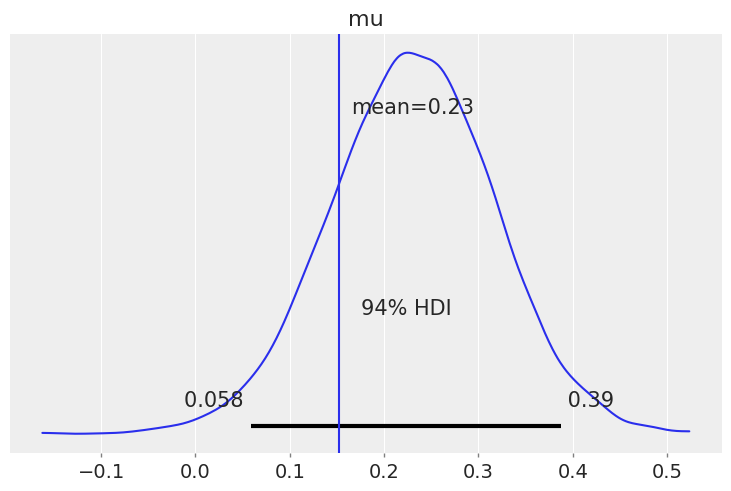

In [20]:
posterior_mu = idata_test.posterior_predictive["mu"]
# print(posterior_mu[0])
k=46
az.plot_posterior(posterior_mu.sel(mu_dim_0=k))
plt.axvline((y_test.to_list()[k]))

### T distribution 

In [210]:
with pm.Model(coords=coords) as bm_model_studentT:
    X  = pm.Data("X",X_train,dims=['obs','features'])
    y = pm.Data("Y",y_train ,dims=["obs"])

    intercept = pm.Normal("intercept",mu=0,sigma=2)
    betas = pm.StudentT('betas',mu=0,sigma=1,nu=20,dims=["feature"])
    sigma = pm.HalfNormal("sigma",sigma=1)

    mu = pm.Deterministic("mu",intercept + pm.math.dot(X,betas))
    y_obs = pm.Normal("SalePrice",mu=mu,sigma=sigma,observed=y)

    idata_Tdist= pm.sample(draes=2000,tune=1000)
    pm.compute_log_likelihood(idata_Tdist);

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.


Output()

Sampling: [SalePrice]


Output()

(-5.0, 5.0)

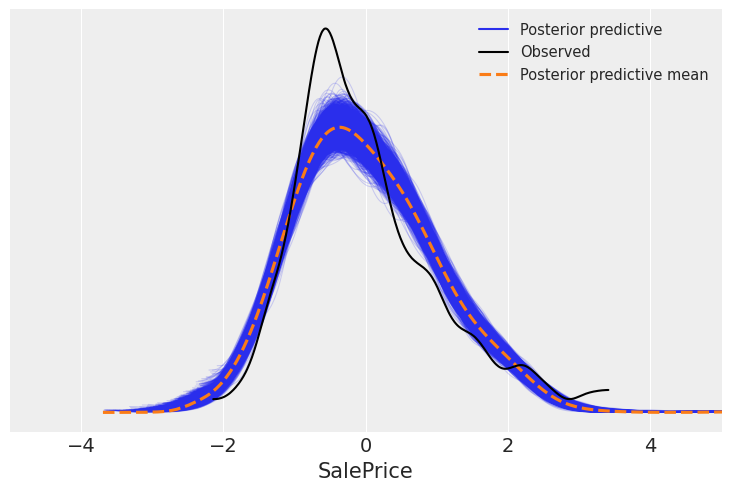

In [99]:
with bm_model_studentT:
    posterior_predictive =pm.sample_posterior_predictive(idata_Tdist,return_inferencedata=True)
    idata_Tdist.extend(posterior_predictive)
az.plot_ppc(idata_Tdist,group="posterior",data_pairs={"SalePrice":"SalePrice"})
plt.xlim(-5,5)

In [211]:
with bm_model_studentT:
    pm.set_data({"X":X_test})
    idata_Tdist_test = pm.sample_posterior_predictive(idata_Tdist,var_names=["mu"],return_inferencedata=True)

y_pred_tdist = idata_Tdist_test.posterior_predictive["mu"].mean(("chain","draw"))

print("MSE : ",mean_squared_error(y_pred_tdist,y_test))
print("R2 score : ",r2_score(y_pred_tdist,y_test))

Sampling: []


Output()

MSE :  0.18754251357696608
R2 score :  0.8076800568581917


In [109]:
with pm.Model(coords=coords) as model_hierarchical:
    X = pm.Data("X", X_train, dims=["obs", "feature"])
    y = pm.Data("y", y_train, dims=["obs"])

    # Hyperpriors
    mu_beta = pm.Normal("mu_beta", mu=0, sigma=2)
    sigma_beta = pm.HalfNormal("sigma_beta", sigma=1)

    # Hierarchical prior for betas
    betas = pm.Normal("betas", mu=mu_beta, sigma=sigma_beta, dims="feature")

    intercept = pm.Normal("intercept", mu=0, sigma=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    mu = pm.Deterministic("mu", intercept + pm.math.dot(X, betas))
    y_obs = pm.StudentT("SalePrice", mu=mu, sigma=sigma,nu=20, observed=y)

    idata_hier = pm.sample(draws=2000, tune=1000)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_beta, sigma_beta, betas, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 55 seconds.


In [110]:
with model_hierarchical:
    pm.set_data({"X":X_test})
    idata_hier_test = pm.sample_posterior_predictive(idata_hier,var_names=["mu"],return_inferencedata=True)

y_pred = idata_hier_test.posterior_predictive["mu"].mean(["draw","chain"])
print("MSE : ",mean_squared_error(y_pred,y_test))
print("R2 score : ",r2_score(y_pred,y_test))

Sampling: []


Output()

MSE :  0.16555682640799116
R2 score :  0.835724734573403


### Lasso Regression

In [283]:
with pm.Model(coords=coords) as lasso_model:
    X= pm.Data("X",X_train,dims=["obs","features"])
    Y = pm.Data("Y",y_train, dims=["obs"])

    intercept = pm.Normal("intercept",mu=0,sigma=1)
    sigma = pm.HalfNormal("sigma",sigma=1)
    lambda_ = pm.HalfNormal("lambda",sigma=2)
    betas = pm.Laplace("betas",mu=0, b=lambda_,dims=["feature"])
    
    mu = pm.Deterministic("mu",intercept+pm.math.dot(X,betas))
    y_obs = pm.StudentT("SalePrice",mu=mu,sigma=sigma,nu=10,observed =Y)

    idata_lasso = pm.sample(draws=2000,tune=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, sigma, lambda, betas]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 60 seconds.


In [284]:
with lasso_model:
    pm.set_data({"X":X_test})
    idata_lasso_test = pm.sample_posterior_predictive(idata_lasso,var_names=["mu"],return_inferencedata=True)

y_pred_lasso = idata_lasso_test.posterior_predictive["mu"].mean(["chain","draw"])
print("MSE :",mean_squared_error(y_pred_lasso,y_test))
print("R2 score :",r2_score(y_pred_lasso,y_test))

Sampling: []


Output()

MSE : 0.159105129285146
R2 score : 0.8401230431258048


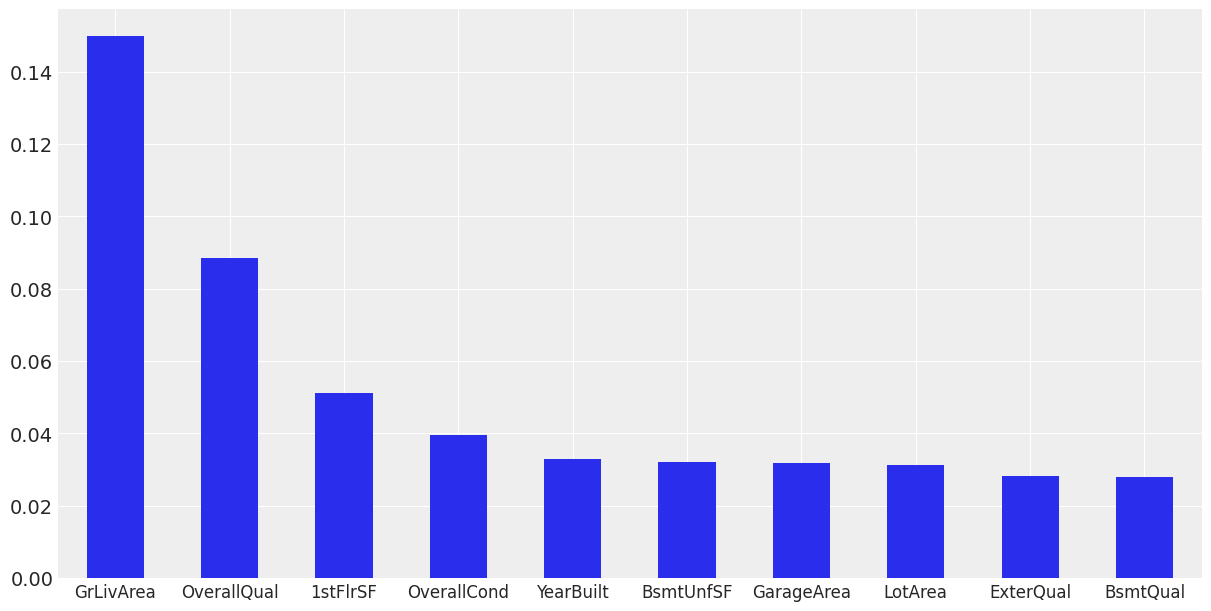

In [202]:
df_bayes_model_lasso = az.summary(idata_lasso,var_names=['betas'],kind='all')
df_bayes_model_lasso.index =cols
df_bayes_model_lasso["abs_mean"] = abs(df_bayes_model_lasso['mean'])
df_bayes_model_lasso["abs_mean"] = df_bayes_model_lasso["abs_mean"]/df_bayes_model_lasso["abs_mean"].sum()
df_bayes_model_lasso['confidence'] = df_bayes_model_lasso["abs_mean"]/df_bayes_model_lasso["sd"]
df_bayes_model_lasso.sort_values(by='abs_mean',ascending=False,inplace=True)
main_features_lasso = df_bayes_model_lasso[:10].index
(df_bayes_model_lasso["abs_mean"])[:10].plot(kind='bar',legend=False,figsize=(12,6),)
plt.xticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.savefig('./bm_lasso_feat.pdf')
plt.show()


In [165]:
df_bayes_model_lasso.sort_values(by=["confidence"],ascending=False)[:10]

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat,abs_mean,confidence
GrLivArea,0.349,0.024,0.304,0.393,0.001,0.0,2136.0,2331.0,1.0,0.149785,6.241059
OverallQual,0.206,0.017,0.173,0.238,0.000,0.0,3896.0,3093.0,1.0,0.088412,5.200707
OverallCond,0.092,0.012,0.071,0.115,0.000,0.0,3720.0,2983.0,1.0,0.039485,3.290415
1stFlrSF,0.119,0.018,0.086,0.153,0.000,0.0,2222.0,2618.0,1.0,0.051073,2.837387
LotArea,0.073,0.013,0.051,0.098,0.000,0.0,3815.0,3105.0,1.0,0.031330,2.410036
Condition1,0.051,0.010,0.031,0.069,0.000,0.0,4864.0,2949.0,1.0,0.021888,2.188841
BsmtUnfSF,-0.075,0.015,-0.103,-0.049,0.000,0.0,2095.0,2946.0,1.0,0.032189,2.145923
MSSubClass,-0.058,0.012,-0.082,-0.036,0.000,0.0,3171.0,3167.0,1.0,0.024893,2.074392
MasVnrArea,0.053,0.011,0.032,0.073,0.000,0.0,5644.0,3176.0,1.0,0.022747,2.067889
Functional,0.047,0.010,0.028,0.066,0.000,0.0,4962.0,3159.0,1.0,0.020172,2.017167


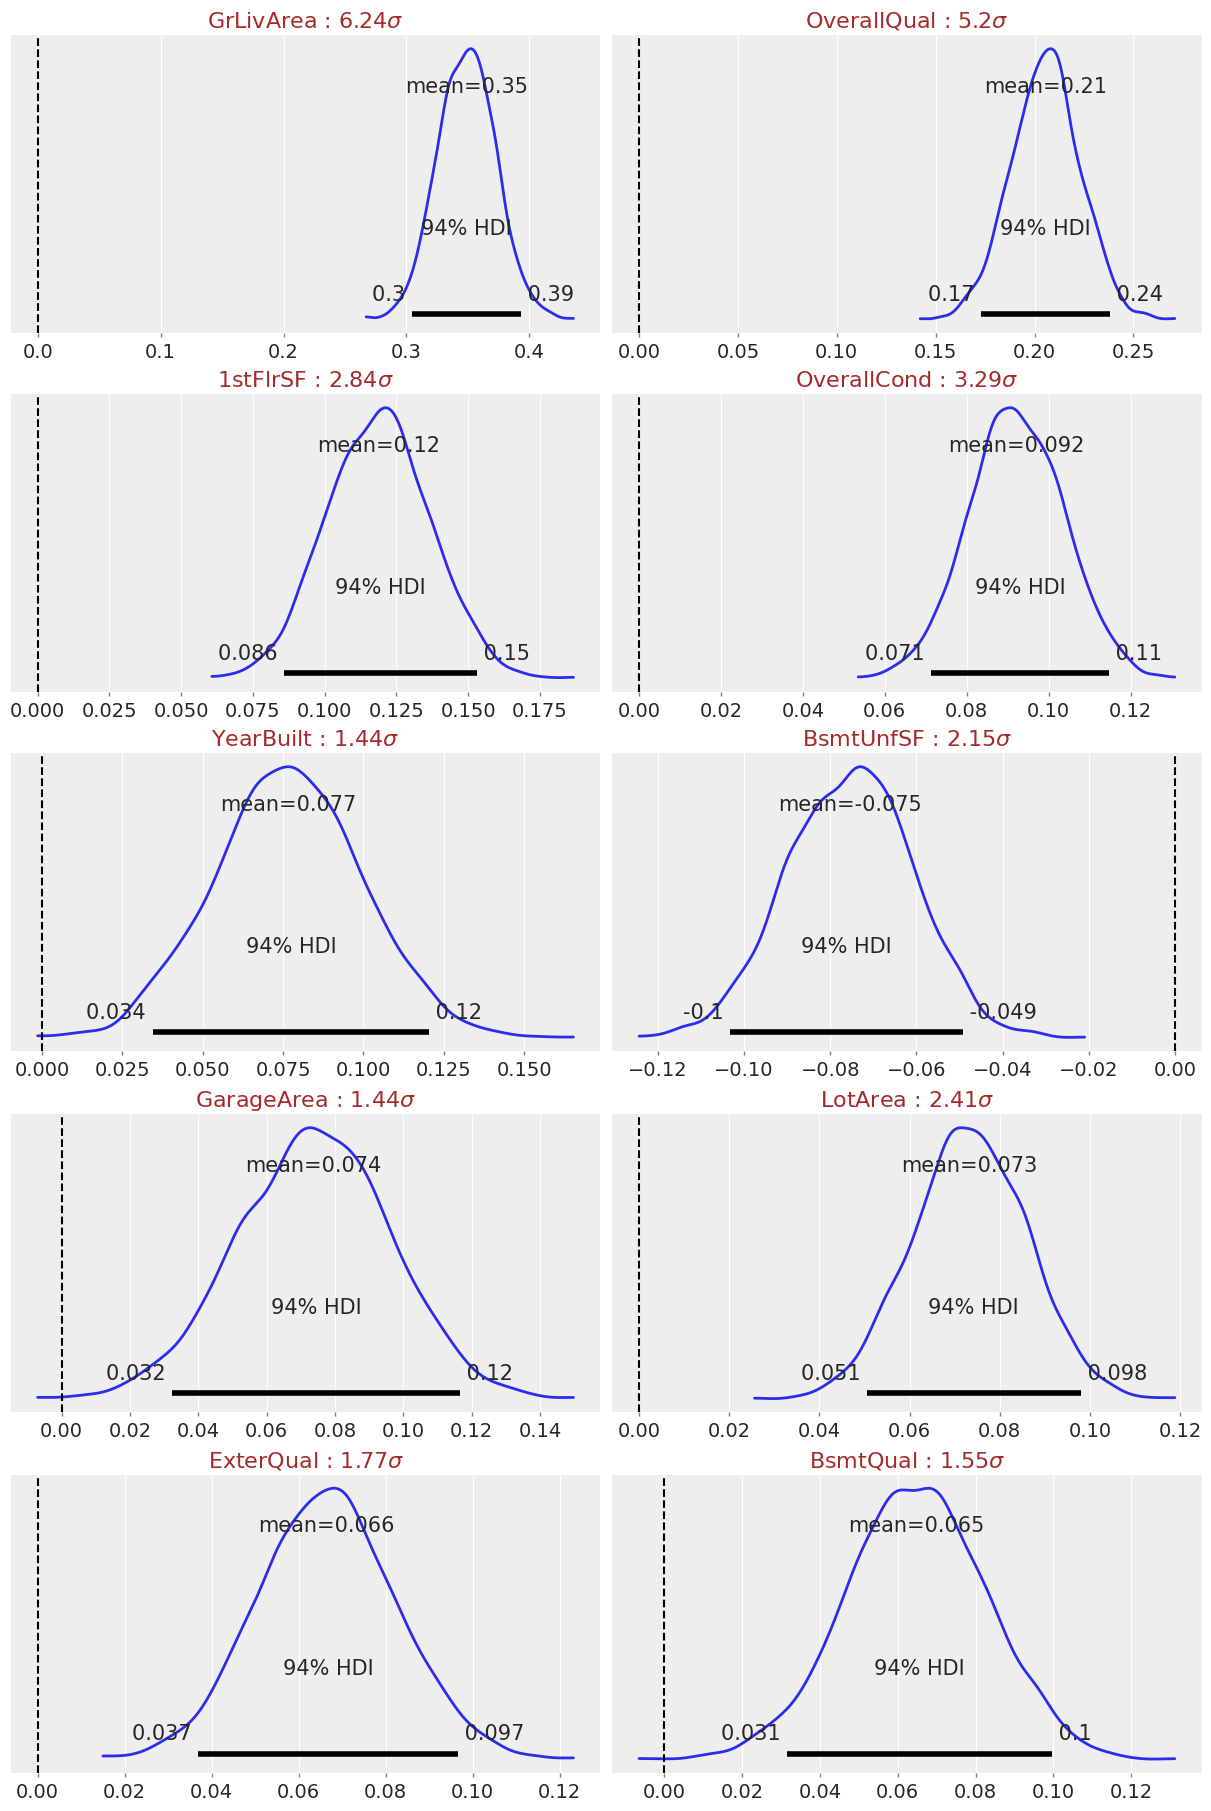

In [201]:
fig,ax = plt.subplots(5,2,figsize=(12,18))

for i in range(10):
    row,col = divmod(i,2)
    az.plot_posterior(idata_lasso,var_names=["betas"],coords={"feature":main_features_lasso[i]},lw=2,ax=ax[row,col])
    ax[row,col].set_title(f"{main_features_lasso[i]} : {round(df_bayes_model_lasso.loc[main_features_lasso[i],'confidence'],2)}$\sigma$",c="brown")
    ax[row,col].axvline(0,c='k',ls='--')
plt.savefig('./post_param_bm_lasso.pdf')
plt.show();

### Hierarchical Model

In [256]:
X_train["MSZoning"].value_counts()

MSZoning
 0.365584    906
-2.163684    172
 1.630218     47
-0.899050     13
-3.428317      7
Name: count, dtype: int64

In [ ]:
# X_hier = X_train.drop('MSZoning',axis=1)
# col_hier = X_hier.columns
# Zone = X_train["MSZoning"].astype("category").cat.codes
# n_zones = Zone.nunique()
# with pm.Model(coords={"feature":col_hier,"zone": np.arange(n_zones)}) as model_hier_neigh:
#     X = pm.Data("data",X_hier, dims = ["obs","feature"])
#     zone = pm.Data("MSZoning",Zone,dims=["obs"])
#     Y = pm.Data("Y",y_train,dims=["obs"])

#     mu_a = pm.Normal('mu_a',mu=0,sigma=10)
#     mu_b = pm.Normal('mu_b',mu=0,sigma=10)

#     sigma_a = pm.HalfNormal('sigma_a',sigma=10)
    
#     # Non-centered parameters
#     z_a = pm.Normal("z_a", mu=0, sigma=1, dims="zone")
    

#     # Actual intercepts/slopes
#     a = pm.Deterministic("a", mu_a + z_a * sigma_a)
#     # Random slopes (matrix)
#     mu_beta = pm.Normal("mu_beta", mu=0, sigma=1, dims="feature")
#     sigma_beta = pm.HalfNormal("sigma_beta", sigma=1, dims="feature")
#     z_beta = pm.Normal("z_beta", mu=0, sigma=1, dims=("zone", "feature"))
#     beta = pm.Deterministic("beta", mu_beta + sigma_beta * z_beta)

#     # Predicted mean
#     mu = a[zone] + pm.math.dot(X,beta[zone])
    
#     sigma = pm.HalfNormal("sigma",sigma=10)
#     y_obs = pm.Normal('y_obs',mu=mu,sigma=sigma,observed=Y)
#     idata_hier_neigh = pm.sample()

In [277]:
X_hier = X_train.drop("MSZoning", axis=1)
Zone = X_train["MSZoning"].astype("category").cat.codes
n_zones = Zone.nunique()
col_hier = X_hier.columns

with pm.Model(coords={"zone": np.arange(n_zones), "feature": col_hier}) as hier_model:
    # Data
    X = pm.Data("X", X_hier.values, dims=["obs", "feature"])
    zone = pm.Data("zone", Zone.values, dims=["obs"])
    Y = pm.Data("Y", y_train.values, dims=["obs"])

    # Hyperpriors
    mu_alpha = pm.Normal("mu_alpha", mu=0, sigma=1)
    sigma_alpha = pm.HalfNormal("sigma_alpha", sigma=1)

    mu_beta = pm.Normal("mu_beta", mu=0, sigma=1, dims="feature")
    sigma_beta = pm.HalfNormal("sigma_beta", sigma=0.5, dims="feature")

    # Non-centered group-level parameters
    z_alpha = pm.Normal("z_alpha", mu=0, sigma=1, dims="zone")
    alpha = pm.Deterministic("alpha", mu_alpha + sigma_alpha * z_alpha)

    z_beta = pm.Normal("z_beta", mu=0, sigma=1, dims=("zone", "feature"))
    beta = pm.Deterministic("beta", mu_beta + sigma_beta* z_beta)

    # Expected value per observation
    mu = pm.Deterministic("mu",alpha[zone] + (X * beta[zone]).sum(axis=1))

    sigma = pm.HalfNormal("sigma", sigma=2)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=Y)

    idata = pm.sample(3000, tune=1000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu_alpha, sigma_alpha, mu_beta, sigma_beta, z_alpha, z_beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 2509 seconds.
There were 505 divergences after tuning. Increase `target_accept` or reparameterize.


In [295]:
X_hier = X_train.drop(columns=["MSZoning"])
zones = X_train["MSZoning"].astype("category").cat.codes
n_zones = zones.nunique()
col_hier = X_hier.columns

with pm.Model(coords={"zone":np.arange(n_zones),"features":col_hier}) as hier_model:
    X = pm.Data("X",X_hier,dims=["obs","features"])
    mzone = pm.Data("Zone",zones,dims=["obs"])
    Y = pm.Data("Y",y_train,dims=["obs"])

    sigma_alpha = pm.HalfNormal("sigma_alpha",sigma=1)
    mu_alpha = pm.Normal("mu_alpha",mu=0,sigma=1)
    alpha = pm.Normal("alpha",mu = mu_alpha, sigma=sigma_alpha , shape = n_zones)

    lambda_ = pm.HalfNormal("lambda",sigma=2)
    mu_beta = pm.Normal("mu_beta",mu=0,sigma=1)
    beta = pm.Laplace("betas",mu=mu_beta,b=lambda_,dims=["zone","features"])

    mu = pm.Deterministic("mu",alpha[mzone]+pm.math.sum(X * beta[mzone], axis=1))
    sigma= pm.HalfNormal("sigma",sigma=2)
    y_obs = pm.StudentT("y_obs",mu=mu,sigma=sigma,nu=10,observed=Y)
    idata_hier = pm.sample()


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma_alpha, mu_alpha, alpha, lambda, mu_beta, betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 578 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.


In [288]:
az.to_netcdf(idata_hier,"model_results/studentTnu10_laplace_fixbeta.nc")

'model_results/studentTnu10_laplace_fixbeta.nc'

In [294]:
X_test_hier = X_test.drop("MSZoning", axis=1)
Zone_test = X_test["MSZoning"].astype("category").cat.codes
with hier_model:
    pm.set_data({"X": X_test_hier.values, "Zone": Zone_test.values})
    posterior_preds = pm.sample_posterior_predictive(idata_hier, var_names=["mu"])
    
mean_preds = posterior_preds.posterior_predictive["mu"].mean(["chain","draw"])
print("MSE : ",mean_squared_error(y_test,mean_preds))
print("R2 score : ",r2_score(y_test,mean_preds))


Sampling: []


Output()

MSE :  0.1357277057970498
R2 score :  0.8846613360100325


### Removing features consistent with zero

In [21]:
# df_house_rd = df_house.drop(columns=predictor_zero_consistent)
# # print(df_house_rd.isna().sum())
# X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(
#     df_house_rd.drop(columns=['Id','Unnamed: 0','SalePrice']),
#     df_house_rd['SalePrice'],
#     test_size=0.2
#     )
# mean_train = (X_train_rd.mean(axis=0))
# std_train = X_train_rd.std(axis=0)

# mean_ytrain = y_train_rd.mean(axis=0)
# std_ytrain = y_train_rd.std(axis=0)

# X_train_rd = (X_train_rd - mean_train)/std_train
# X_test_rd = (X_test_rd - mean_train)/std_train
# y_train_rd = (y_train_rd - mean_ytrain)/std_ytrain
# y_test_rd = (y_test_rd - mean_ytrain)/std_ytrain

# print(y_train_rd.isna().sum())

In [22]:
# coords = {"feature":X_train_rd.columns}

# with pm.Model(coords=coords) as lr_model_rd:
#     X = pm.Data("X",X_train_rd,dims=["obs","feature"])
#     y = pm.Data("y",y_train_rd,dims=["obs"])
    
#     intercept = pm.Normal("intercept",mu=0,sigma=10)
#     betas = pm.Normal("betas",mu=0,sigma=2,dims="feature")
#     sigma = pm.HalfNormal("sigma",sigma=1)

#     mu = pm.Deterministic("mu",intercept + pm.math.dot(X,betas))

#     y_obs = pm.Normal("SalePrice",mu=mu,sigma=sigma,observed=y)
#     idata_rd = pm.sample()
#     pm.compute_log_likelihood(idata_rd);



In [23]:
# loo_rd = az.loo(idata_rd)

In [24]:
# model_comp = az.compare({"model1":idata,"model2":idata_rd})
# display(model_comp)

In [25]:

# # print(hdi_betas[zero_consistent])

# hdi_betas = az.hdi(idata_rd,hdi_prob=0.05)["betas"]
# zero_consistent = (hdi_betas.sel(hdi='lower')<0) & (hdi_betas.sel(hdi='higher')>0)
# predictor_zero_consistent = hdi_betas["feature"].values[zero_consistent]
# print(predictor_zero_consistent)

In [26]:
# with lr_model_rd:
#     pm.set_data({"X":X_test_rd})
#     idata_rd_test = pm.sample_posterior_predictive(idata_rd,var_names=["mu"],return_inferencedata=True)

In [27]:
# mu_rd_test = idata_rd_test.posterior_predictive["mu"].mean(["chain","draw"])

# print("MSE :",mean_squared_error(mu_rd_test,y_test_rd))
# print("R2 score :",r2_score(mu_rd_test,y_test_rd))

In [28]:
# az.plot_khat(loo_rd)

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# df_house = pd.read_csv('./housing_price.csv')

In [31]:
# X_train, X_test, y_train, y_test = train_test_split(
#     df_house.drop(columns=['Id','Unnamed: 0','SalePrice']),
#     df_house['SalePrice'],
#     test_size=0.2
#     )
print(X_train.shape)
# mean_train = (X_train.mean(axis=0))
# std_train = X_train.std(axis=0)

# mean_ytrain = y_train.mean(axis=0)
# std_ytrain = y_train.std(axis=0)

# X_train = (X_train - mean_train)/std_train
# X_test = (X_test - mean_train)/std_train
# y_train = (y_train - mean_ytrain)/std_ytrain
# y_test = (y_test - mean_ytrain)/std_ytrain



(1145, 65)


In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Mean squared error",mean_squared_error(y_pred_lr,y_test))
print("R2 score :",r2_score(y_pred_lr,y_test))

Mean squared error 0.18765559385967404
R2 score : 0.807648254213865


/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated

In [33]:
df_lr_coeff = pd.DataFrame({"feature":X_train.columns,"weight":abs(lr_model.coef_)})
df_lr_coeff.set_index("feature",inplace=True)
df_lr_coeff = df_lr_coeff/df_lr_coeff.sum()
(df_lr_coeff.sort_values(by="weight",ascending=False,inplace=True))
# for name, coef in zip(X_train.columns, lr_model.coef_):
#     print(f"{name}: {coef:.4f}")

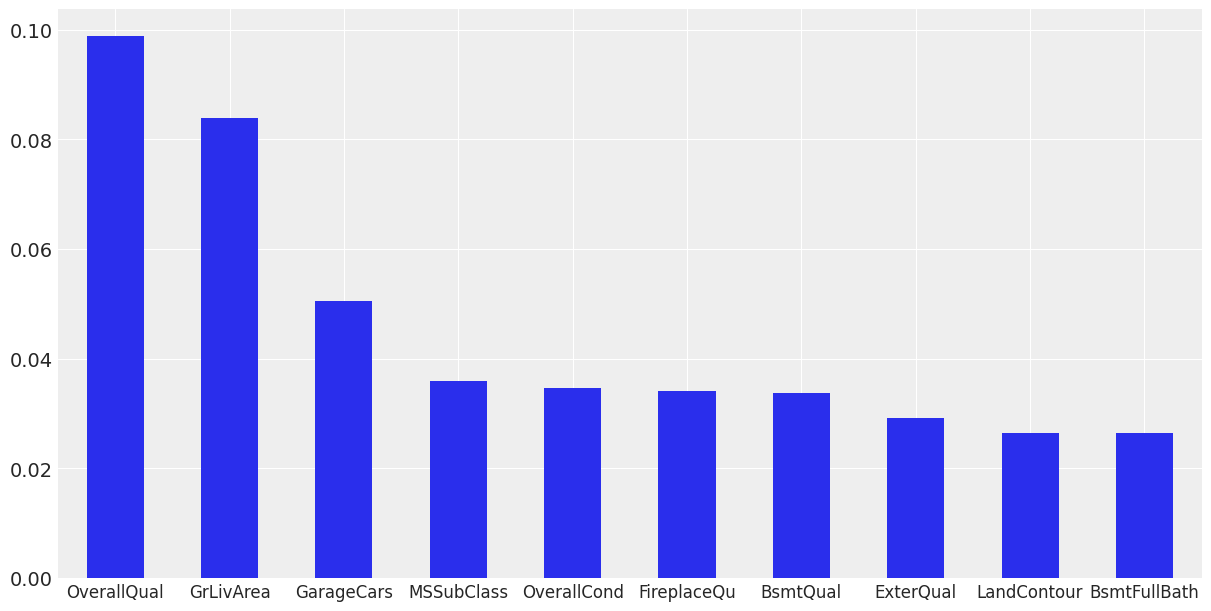

In [200]:
df_lr_coeff[:10].plot(kind='bar',figsize=(12,6),legend=False)
# plt.title("Feature coefficient(normalised) from Linear Regression model")
plt.xticks(rotation=0,fontsize=12)
plt.xlabel("")
plt.tight_layout()
plt.savefig('./lr_feat.pdf')
plt.show()

0.016862454496946636 0.4336201053041527


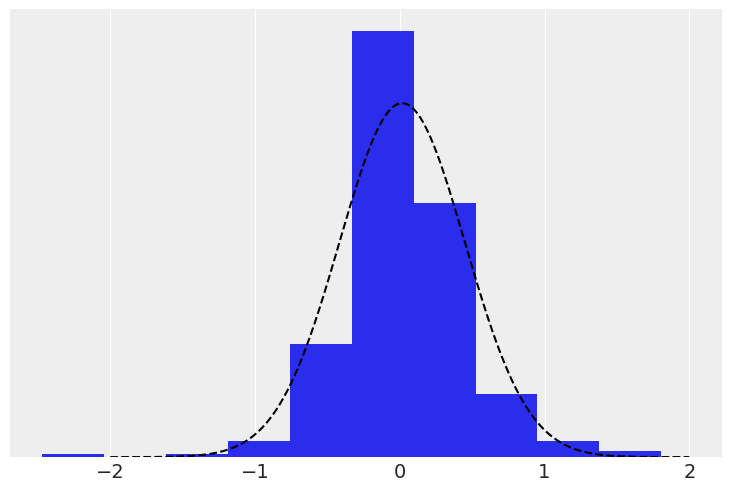

In [199]:
import seaborn as sns

residuals = y_test-y_pred_lr
std_res = residuals.std()
mean_res = residuals.mean()
x= np.linspace(-2,2,1000)
# sns.scatterplot(x=y_pred_lr,y=residuals)
print(mean_res,std_res)
plt.hist(residuals,density=True)
plt.plot(x,norm.pdf(x,mean_res,std_res),c='k',ls='--')
plt.yticks([])
plt.tight_layout()
plt.savefig("./res_lr.pdf")
plt.show()

### Finetuning

In [ ]:

from sklearn.linear_model import RidgeCV, LassoCV



# Ridge Regression with cross-validation
alphas = np.logspace(-3, 4, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5);
ridge_cv.fit(X_train, y_train);

# Lasso Regression with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000);
lasso_cv.fit(X_train, y_train);

# Evaluation
models = {"Ridge": ridge_cv, "Lasso": lasso_cv}
for name, model in models.items():
    y_pred = model.predict(X_test);
    print(f"{name} - Best alpha: {model.alpha_:.4f}")
    print(f"{name} - MSE: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"{name} - R²: {r2_score(y_test, y_pred):.4f}")
    print()

/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated

Ridge - Best alpha: 278.2559
Ridge - MSE: 0.1710
Ridge - R²: 0.8547

Lasso - Best alpha: 0.0135
Lasso - MSE: 0.1622
Lasso - R²: 0.8621



/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated

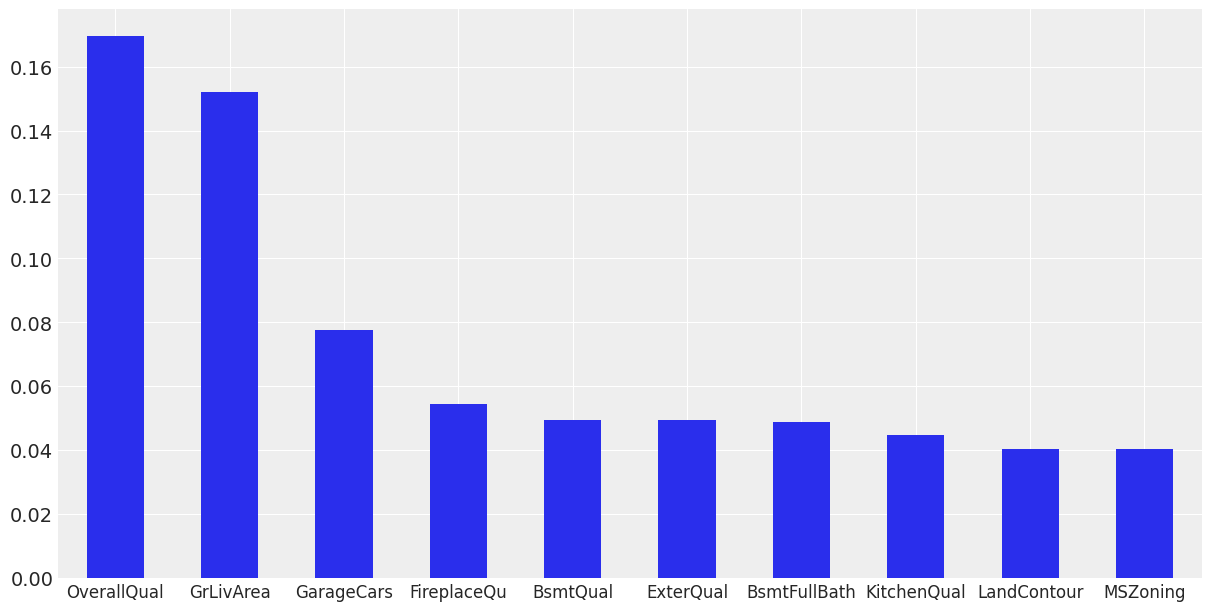

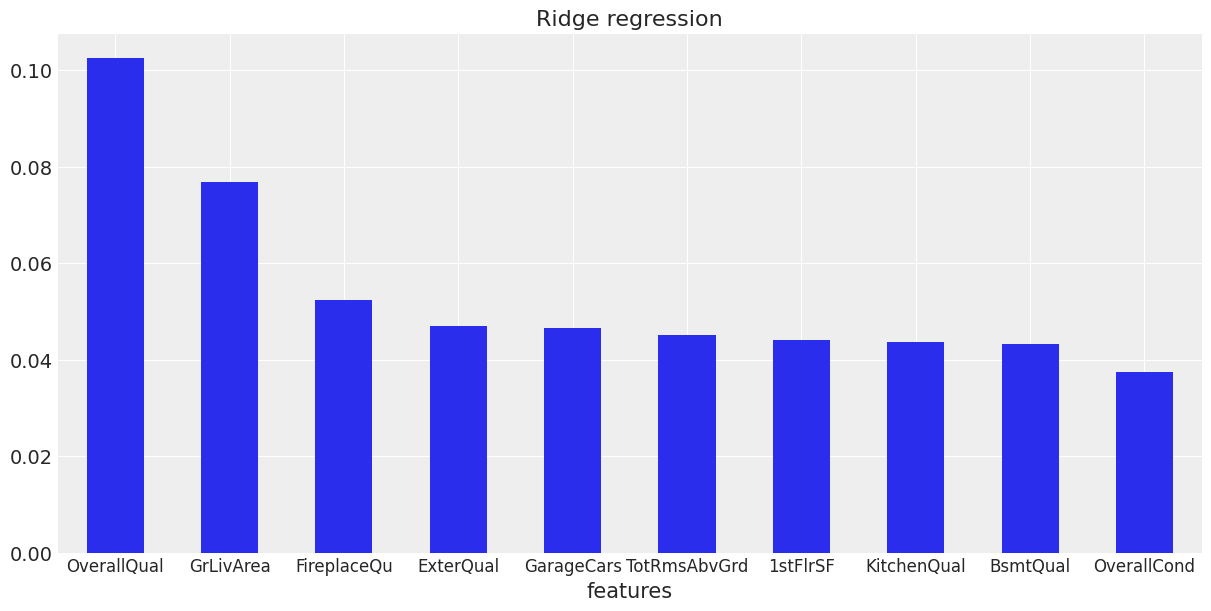

In [198]:
df_lasso_feat = pd.DataFrame({"features":X_train.columns,"weight":lasso_cv.coef_})
df_lasso_feat.set_index("features",inplace=True)
df_lasso_feat.sort_values(by='weight',ascending=False,inplace=True)
(df_lasso_feat[:10]/df_lasso_feat.sum()).plot(kind="bar",legend=False,figsize=(12,6))
plt.xticks(rotation=0,fontsize=12)
plt.xlabel('')
plt.tight_layout()
plt.savefig('./lr_lasso_feat.pdf')
plt.show()
df_ridge_feat = pd.DataFrame({"features":X_train.columns,"weight":ridge_cv.coef_})
df_ridge_feat.set_index("features",inplace=True)
df_ridge_feat.sort_values(by='weight',ascending=False,inplace=True)
(df_ridge_feat[:10]/df_ridge_feat.sum()).plot(kind="bar",legend=False,figsize=(12,6),title="Ridge regression")
plt.xticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.show()


In [60]:
from sklearn.linear_model import ElasticNetCV

elastic_cv_model = ElasticNetCV(l1_ratio=np.logspace(-2,-1,100),
                                alphas =np.linspace(0.1,0.5,100),
                                cv=5,max_iter=10000
                                )

elastic_cv_model.fit(X_train,y_train)

y_pred = elastic_cv_model.predict(X_test)

print(f"Best model alpha {elastic_cv_model.alpha_:.3f}")
print(f"Best fit l1 ratio : {elastic_cv_model.l1_ratio_:.3f}")
print(f"MSE : {mean_squared_error(y_pred,y_test)}")
print(f"R2 score : {r2_score(y_pred,y_test)}")

/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Best model alpha 0.144
Best fit l1 ratio : 0.063
MSE : 0.16368562099118097
R2 score : 0.8088312120423125


/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/sklearn/utils/validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


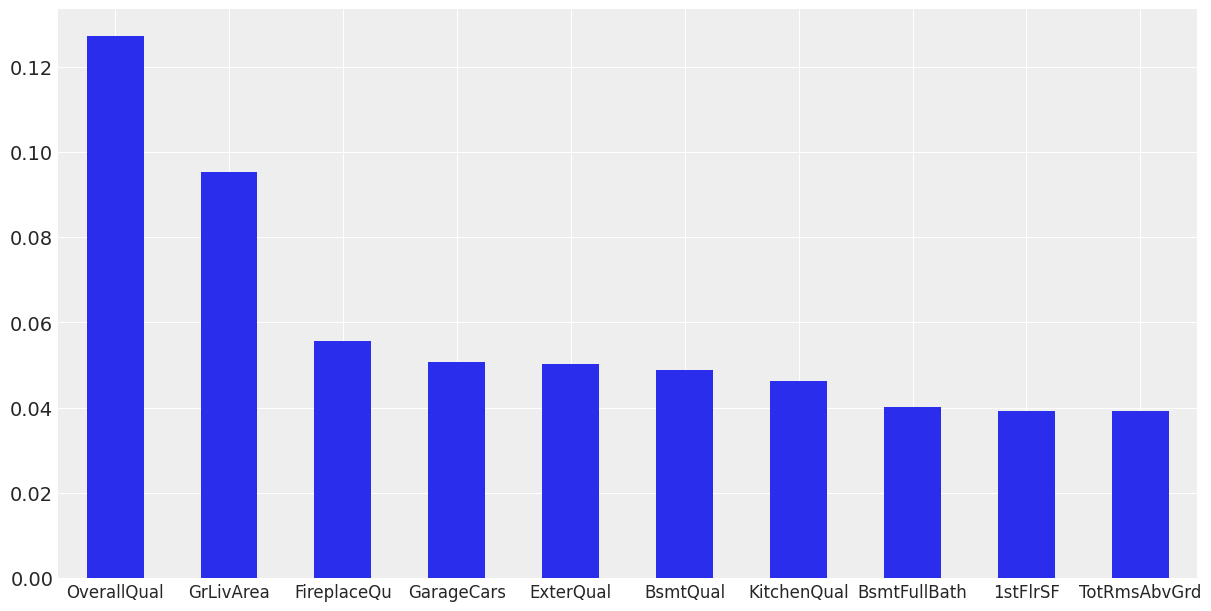

In [ ]:
df_elasticcv_feat = pd.DataFrame({"features":X_train.columns,"weight":elastic_cv_model.coef_})
df_elasticcv_feat.set_index("features",inplace=True)
df_elasticcv_feat.sort_values(by="weight",ascending=False,inplace=True)
(df_elasticcv_feat[:10]/df_elasticcv_feat.sum()).plot(kind="bar",figsize=(12,6),legend=False)
plt.xticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.xlabel("")

plt.show()

## XGBoost

In [36]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)  # y_train can be continuous

/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:364: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
y_pred_xgb = xgb_model.predict(X_test)
print("Mean squared error",mean_squared_error(y_pred_xgb,y_test))
print("R2 score :",r2_score(y_pred_xgb,y_test))

Mean squared error 0.15585695041320838
R2 score : 0.8327039687704673


/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


0.03178936843457511 0.39419260190856525


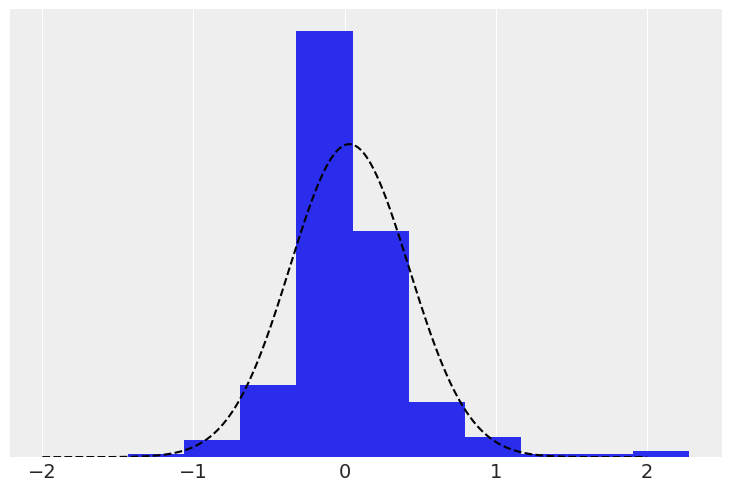

In [197]:
residuals = y_test - y_pred_xgb
res_std = residuals.std()
res_mean = residuals.mean()
print(res_mean,res_std)
x= np.linspace(-2,2,1000)
plt.hist(residuals,density=True)
plt.plot(x,norm.pdf(x,res_mean,res_std),ls='--',c='k')
plt.yticks([])
plt.tight_layout()
plt.savefig("./res_xgb.pdf")
plt.show()


In [39]:
booster = xgb_model.get_booster()
importance_dict = booster.get_score(importance_type="gain")
df_xgb_score = pd.DataFrame.from_dict(importance_dict,orient='index',columns=['weight'])
df_xgb_score = (df_xgb_score/(df_xgb_score.sum())).sort_values(by='weight',ascending=False)
# display(df_xgb_score.sort_values(by='weight',ascending=False)[:10])

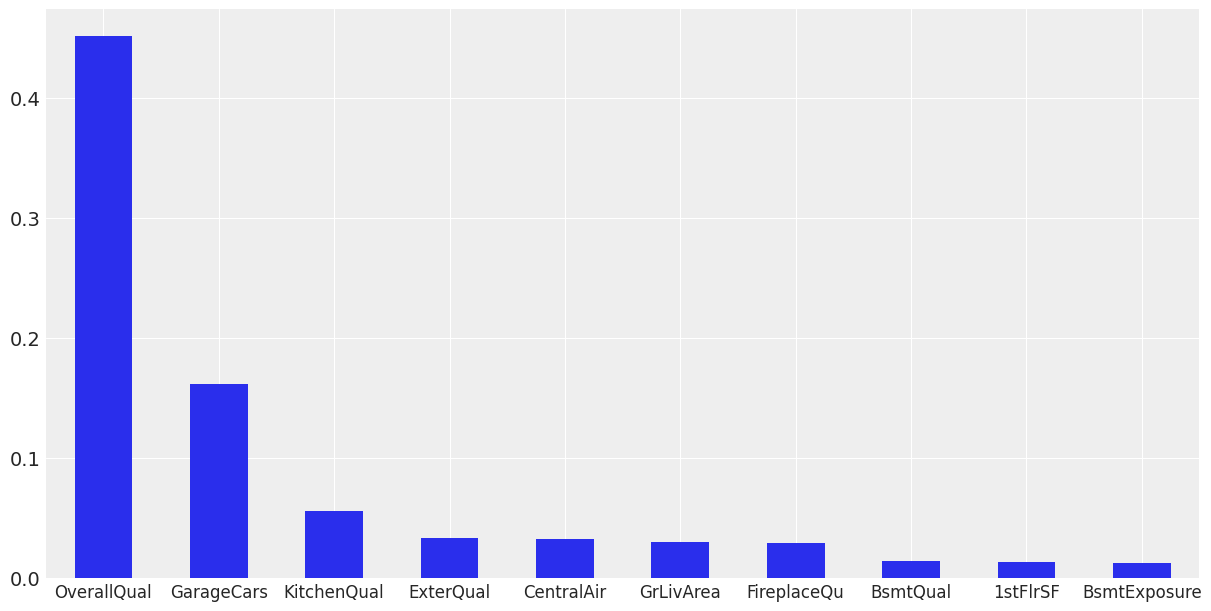

In [196]:
df_xgb_score[:10].plot(kind='bar',figsize=(12,6),legend=False)
plt.xticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.xlabel("")
plt.savefig('./xgb_features.pdf')
plt.show()

### Finetuning

In [281]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

# Model and tuning
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid,
                                   n_iter=30, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

# Evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Best Params: {random_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_spa

Best Params: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
MSE: 0.1245
R² Score: 0.8942


/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:297: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/usr/local/anaconda3/envs/datascience/lib/python3.10/site-packages/xgboost/data.py:299: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:


In [282]:
print(f"Best Params: {random_search.best_params_}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

Best Params: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}
MSE: 0.1245
R² Score: 0.8942


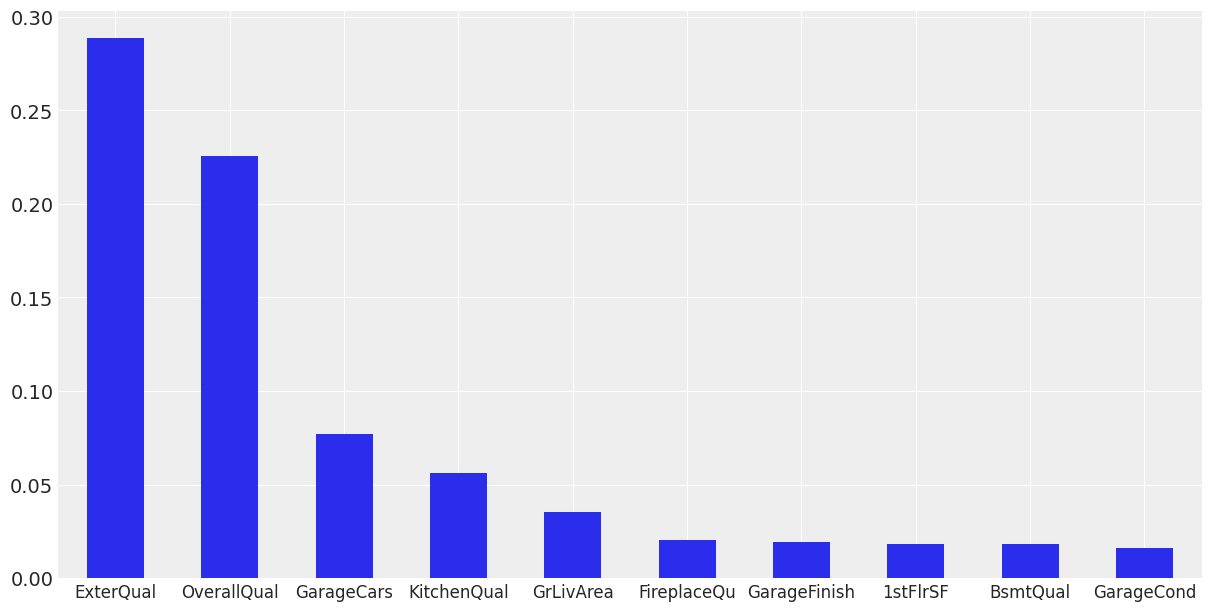

In [195]:
booster = best_model.get_booster()
importance_dict = booster.get_score(importance_type="gain")
df_xgb_ft_score = pd.DataFrame.from_dict(importance_dict,orient="index",columns=["feature"])
df_xgb_ft_score = (df_xgb_ft_score/df_xgb_ft_score.sum()).sort_values(by="feature",ascending=False)
# df_xgb_ft_score.head(5)

df_xgb_ft_score[:10].plot(kind="bar",legend=False,figsize=(12,6))
plt.xticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.xlabel("")
plt.savefig('./xgb_ft_features.pdf')
plt.show()
